In [ ]:
#WITHOUT EPOCHS
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 1) load MNIST
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# use only class "0" and "1"
idx = np.where((y=="0") | (y=="1"))[0]
X = X[idx]
y = y[idx].astype(int)

# normalize pixel values [0,255] → [0,1]
X = X / 255.0

# 2) split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

# 3) define neural network (1 hidden layer, 64 neurons)
nn = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=10)

# 4) train
nn.fit(Xtrain, ytrain)

# 5) test
pred = nn.predict(Xtest)
print("Accuracy:", accuracy_score(ytest, pred))

Accuracy: 0.9997293640054127


c:\Users\Hrishita\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# load MNIST
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

# keep only class 0 and 1 (two class problem)
train_idx = np.where((ytrain==0) | (ytrain==1))[0]
test_idx  = np.where((ytest==0) | (ytest==1))[0]

Xtrain = Xtrain[train_idx]
ytrain = ytrain[train_idx]
Xtest  = Xtest[test_idx]
ytest  = ytest[test_idx]

# reshape: 28x28 -> 784
Xtrain = Xtrain.reshape(-1,784)/255.0
Xtest  = Xtest.reshape(-1,784)/255.0

# convert labels to 2 classes (one hot)
ytrain = to_categorical(ytrain)
ytest  = to_categorical(ytest)

# build model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))  # HIDDEN LAYER
model.add(Dense(2, activation='softmax'))                    # OUTPUT (two class)

# compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train with visible epochs
model.fit(Xtrain, ytrain, epochs=10, batch_size=32, validation_split=0.1)

# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print("Test accuracy:", acc)

c:\Users\Hrishita\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9934 - loss: 0.0196 - val_accuracy: 0.9984 - val_loss: 0.0030
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9990 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 3.5025e-04
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 1.9196e-04
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9993 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 4.6517e-04
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9994 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 3.3618e-04
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9997 - loss: 8.7271e-04 - val_accuracy: 1.0000 - val_loss: 4.6474e-05
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 1.0000 - loss: 1.4763e-04 - val_accuracy: 1.0000 - val_loss: 3.1992e-05
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 1.00

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


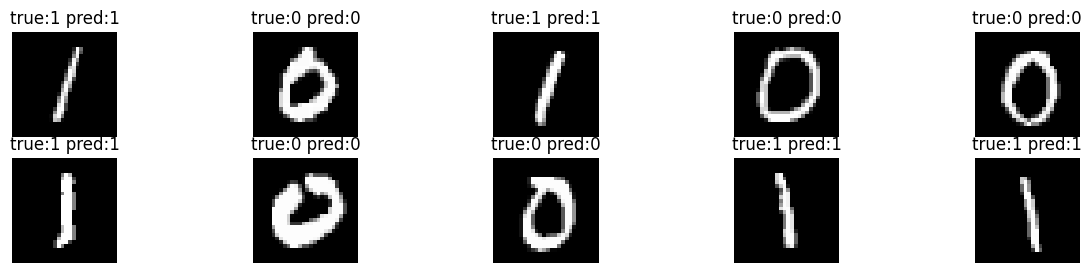

In [ ]:
### visulizaation for tensorflow
import matplotlib.pyplot as plt
import numpy as np

# get predictions (class label, not one-hot)
preds = np.argmax(model.predict(Xtest), axis=1)
true  = np.argmax(ytest, axis=1)

plt.figure(figsize=(15,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(Xtest[i].reshape(28,28), cmap="gray")
    plt.title(f"true:{true[i]} pred:{preds[i]}")
    plt.axis("off")

plt.show()

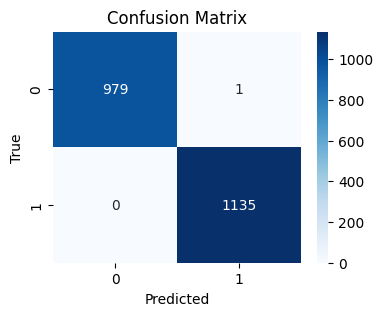

In [ ]:
### visulizaation for tensorflow
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true, preds)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
